In [16]:
#analisis de las acciones de apple
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Descargar datos de Apple desde 2018
apple = yf.download("AAPL", start="2018-01-01", end="2025-01-01")


print(apple.head())



/tmp/ipython-input-1629256662.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.380997  40.390375  39.677740  39.888719  102223600
2018-01-03  40.373959  40.917812  40.310668  40.444285  118071600
2018-01-04  40.561497  40.664642  40.338800  40.446630   89738400
2018-01-05  41.023293  41.110026  40.566177  40.657600   94640000
2018-01-08  40.870930  41.166296  40.772471  40.870930   82271200


In [17]:
# Aplanar las columnas x el MultiIndex
apple.columns = apple.columns.get_level_values(0)

print(apple.head())


Price           Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.380997  40.390375  39.677740  39.888719  102223600
2018-01-03  40.373959  40.917812  40.310668  40.444285  118071600
2018-01-04  40.561497  40.664642  40.338800  40.446630   89738400
2018-01-05  41.023293  41.110026  40.566177  40.657600   94640000
2018-01-08  40.870930  41.166296  40.772471  40.870930   82271200


In [18]:
# Revisar las primeras filas
print("Primeras filas:")
print(apple.head(), "\n")

# Información general del DataFrame
print("Información de la base:")
print(apple.info(), "\n")

# Porcentaje de valores nulos
print("Porcentaje de valores nulos por columna:")
print((apple.isnull().sum() / len(apple)) * 100, "\n")

# Estadísticas descriptivas básicas
print("Estadísticas descriptivas:")
print(apple.describe().T, "\n")

# Revisar rango de fechas
print(f"Rango de fechas: {apple.index.min()} -> {apple.index.max()}")


Primeras filas:
Price           Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.380997  40.390375  39.677740  39.888719  102223600
2018-01-03  40.373959  40.917812  40.310668  40.444285  118071600
2018-01-04  40.561497  40.664642  40.338800  40.446630   89738400
2018-01-05  41.023293  41.110026  40.566177  40.657600   94640000
2018-01-08  40.870930  41.166296  40.772471  40.870930   82271200 

Información de la base:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2018-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1761 non-null   float64
 1   High    1761 non-null   float64
 2   Low     1761 non-null   float64
 3   Open    1761 non-null   float64
 4   Volume  1761 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.5 KB
None 

Porcentaje de valores nulos por columna:
Price
Close   

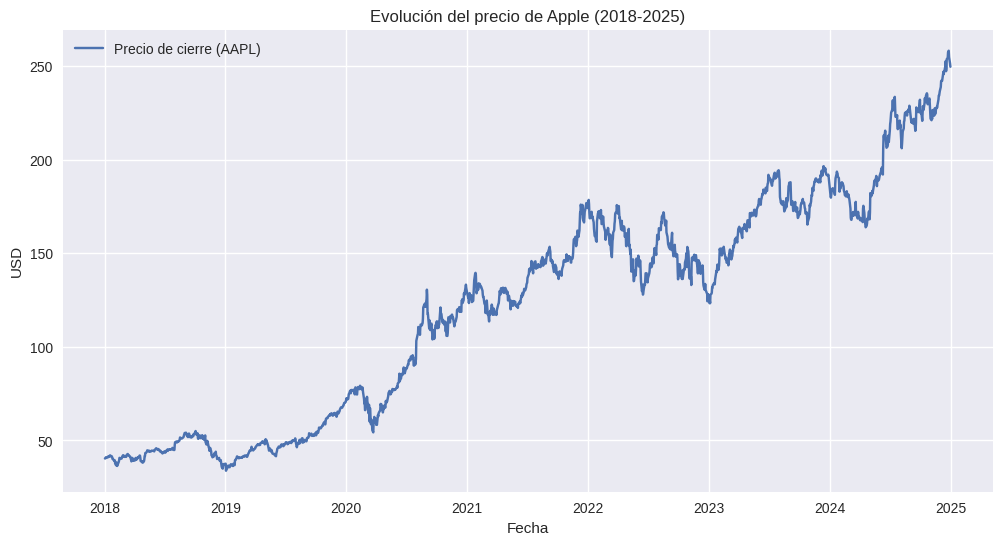

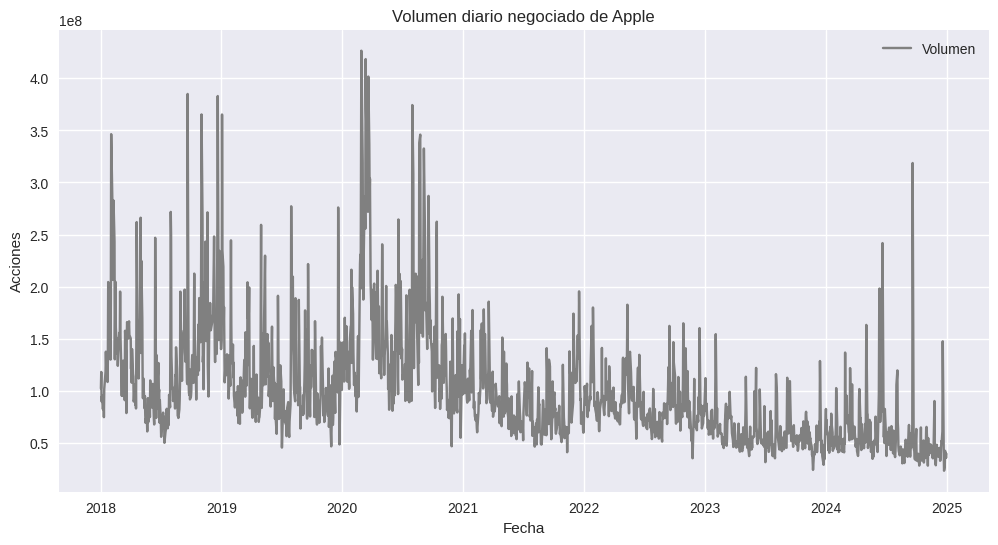

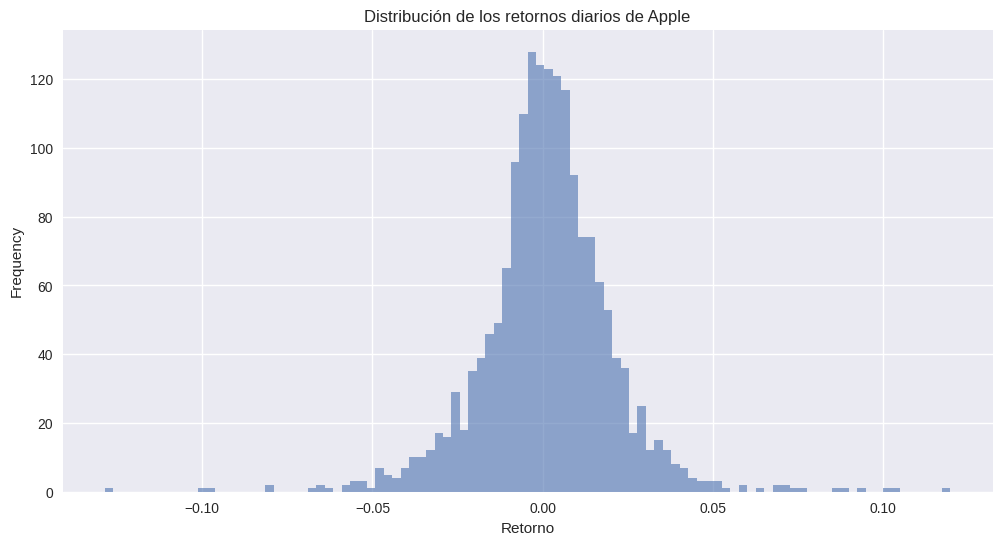

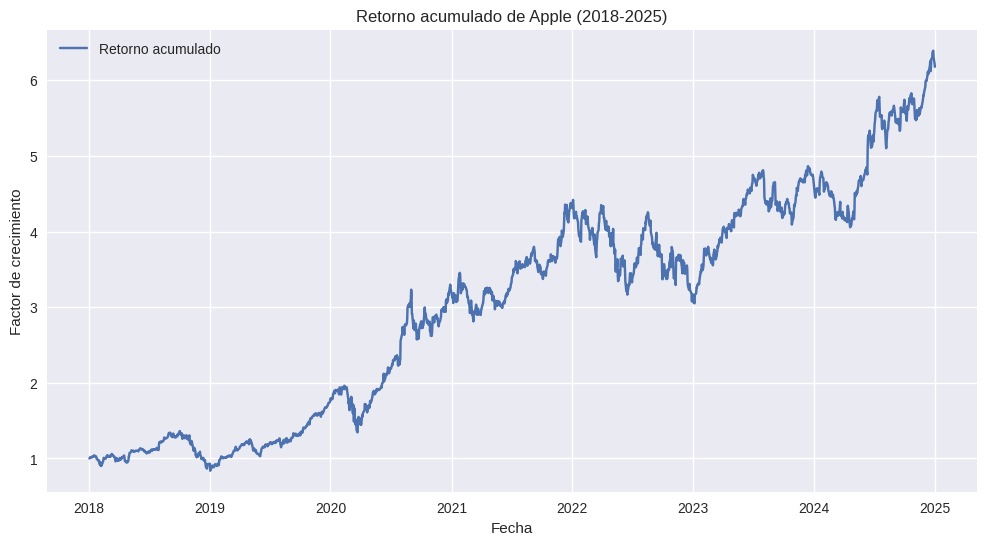

In [19]:

# Configuración básica
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12,6)

# 1. Evolución del precio de cierre
plt.plot(apple['Close'], label="Precio de cierre (AAPL)")
plt.title("Evolución del precio de Apple (2018-2025)")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.legend()
plt.show()

# 2. Volumen negociado
plt.plot(apple['Volume'], color="gray", label="Volumen")
plt.title("Volumen diario negociado de Apple")
plt.xlabel("Fecha")
plt.ylabel("Acciones")
plt.legend()
plt.show()

# 3. Retornos diarios
apple['Daily Return'] = apple['Close'].pct_change()

apple['Daily Return'].plot(kind='hist', bins=100, alpha=0.6)
plt.title("Distribución de los retornos diarios de Apple")
plt.xlabel("Retorno")
plt.show()

# 4. Retornos acumulados
cumulative_return = (1 + apple['Daily Return']).cumprod()

plt.plot(cumulative_return, label="Retorno acumulado")
plt.title("Retorno acumulado de Apple (2018-2025)")
plt.xlabel("Fecha")
plt.ylabel("Factor de crecimiento")
plt.legend()
plt.show()


In [20]:
#indicadores tecnicos SMA50 SMA200
#SMA (Simple Moving Average) = promedio de precios de cierre en una ventana de tiempo.

#SMA50 → promedio de los últimos 50 días de trading (~2 meses).

#SMA200 → promedio de los últimos 200 días de trading (~10 meses).

#Golden Cross: cuando la SMA50 cruza hacia arriba la SMA200 → se interpreta como señal alcista.

#Death Cross: cuando la SMA50 cruza hacia abajo la SMA200 → se interpreta como señal bajista.

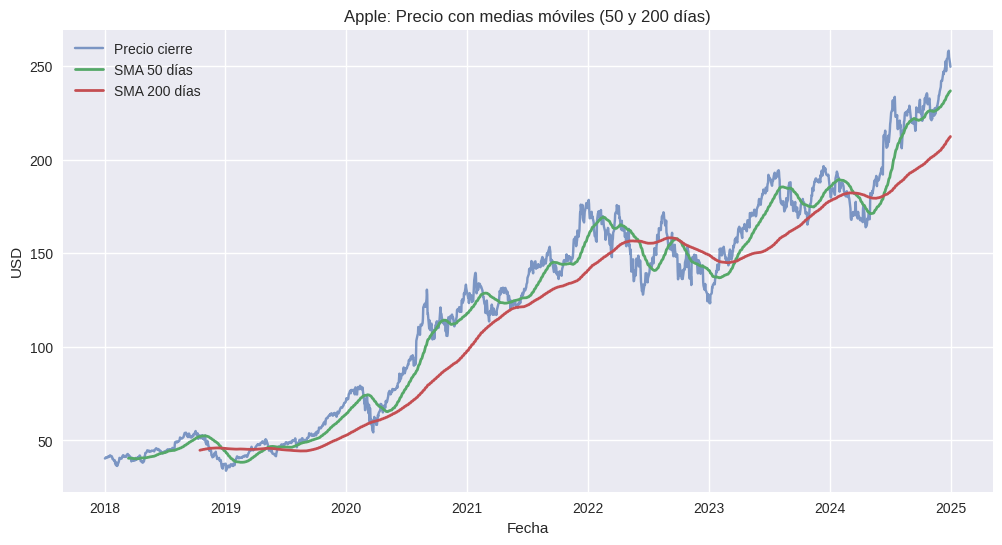

In [21]:
# Calcular medias móviles
apple['SMA50'] = apple['Close'].rolling(window=50).mean()
apple['SMA200'] = apple['Close'].rolling(window=200).mean()

# Gráfico precio con medias móviles
plt.figure(figsize=(12,6))
plt.plot(apple['Close'], label="Precio cierre", alpha=0.7)
plt.plot(apple['SMA50'], label="SMA 50 días", linewidth=2)
plt.plot(apple['SMA200'], label="SMA 200 días", linewidth=2)
plt.title("Apple: Precio con medias móviles (50 y 200 días)")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.legend()
plt.show()


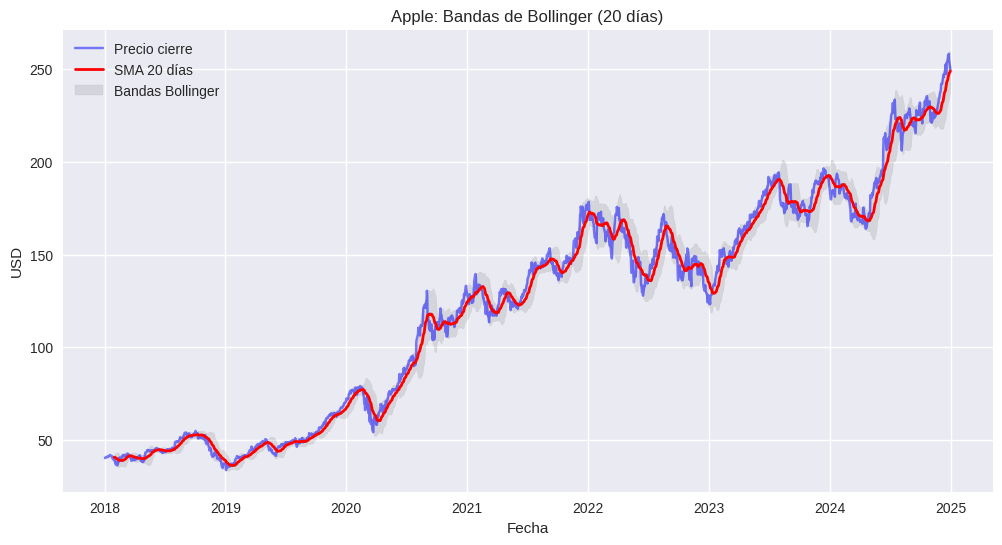

In [22]:

# Cálculo de media móvil de 20 días y desviación
apple['SMA20'] = apple['Close'].rolling(window=20).mean()
apple['STD20'] = apple['Close'].rolling(window=20).std()

apple['Upper'] = apple['SMA20'] + (apple['STD20'] * 2)
apple['Lower'] = apple['SMA20'] - (apple['STD20'] * 2)

# Gráfico con bandas
plt.figure(figsize=(12,6))
plt.plot(apple['Close'], label="Precio cierre", color='blue', alpha=0.5)
plt.plot(apple['SMA20'], label="SMA 20 días", color='red', linewidth=2)
plt.fill_between(apple.index, apple['Upper'], apple['Lower'], color='gray', alpha=0.2, label="Bandas Bollinger")
plt.title("Apple: Bandas de Bollinger (20 días)")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.legend()
plt.show()


In [23]:
#interpretacion de las bandas de Bollinger
#Línea central = SMA20 (promedio 20 días).
#Banda superior = SMA20 + 2 * desviación estándar (STD).
#Banda inferior = SMA20 - 2 * desviación estándar (STD).

#¿Qué muestran?

#Si el precio toca la banda superior → posible sobrecompra.
#Si toca la banda inferior → posible sobreventa.
#Cuando las bandas se estrechan → baja volatilidad (posible ruptura futura).
#Cuando se ensanchan → alta volatilidad.

In [24]:
#Retorno diario = % de cambio respecto al día anterior.

#Retorno acumulado = qué tanto habría crecido tu inversión desde un inicio si hubieras comprado y mantenido la acción.

In [25]:
#Resumen: SMA → tendencia.

#Bollinger → volatilidad.

#Retornos → desempeño de inversión.

In [26]:
#APLICAMOS ARIMA
#ARIMA es un modelo clásico de series de tiempo que sirve para pronosticar valores futuros basados en los históricos.

#Para este caso nuestra serie es el precio de cierre diario.
#ARIMA nos ayudará a estimar el precio de los próximos días según el patrón histórico.
#Se expresa como ARIMA(p,d,q):

#p = número de términos autoregresivos (AR).
#d = número de diferencias para estacionar la serie (I).
#q = número de términos de media móvil (MA).

In [27]:
series = apple['Close']
log_returns = np.log(series).diff().dropna()


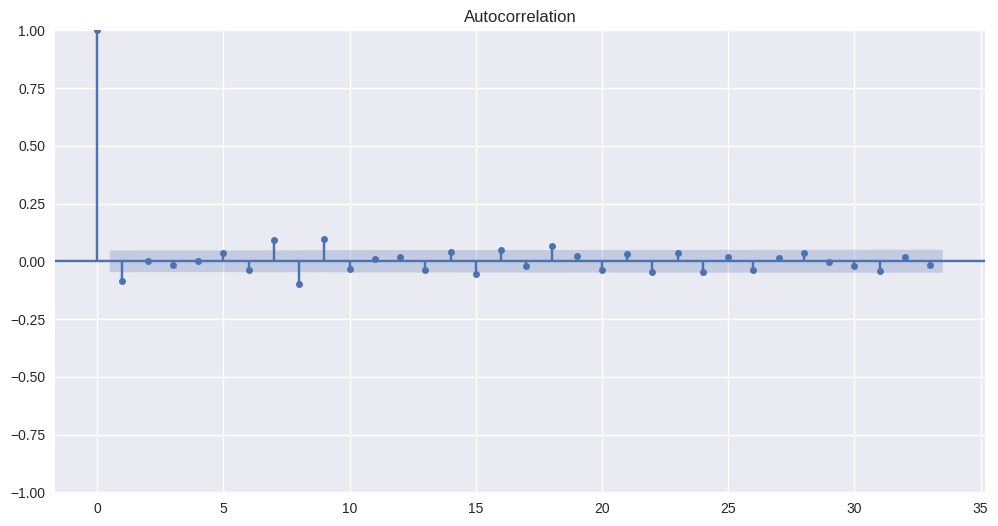

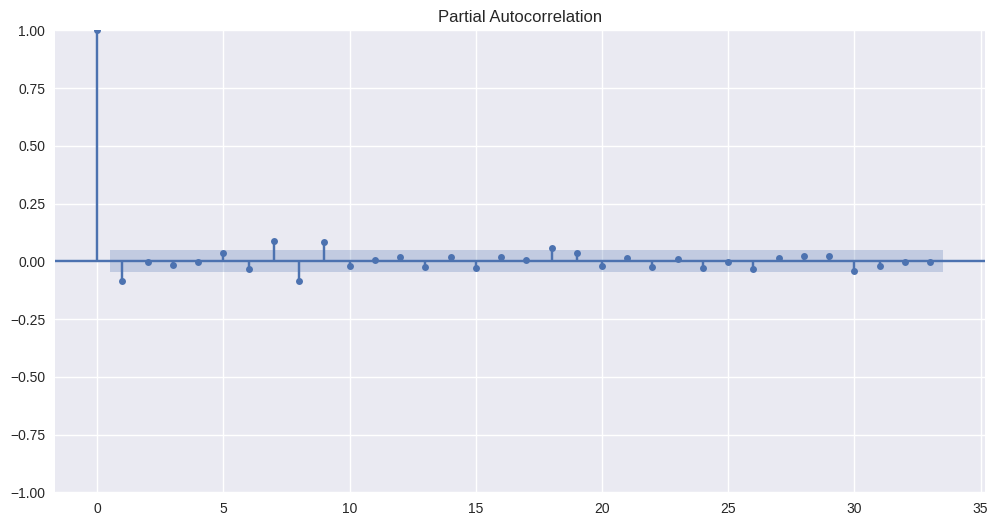

In [28]:
#revisar autocorrelacion
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(log_returns)
plot_pacf(log_returns)
plt.show()


In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(apple['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
# p es >0.05  es una serie no estacionaria y d=1. caso contrario serie estacionaria d=0

ADF Statistic: 0.03962570127013546
p-value: 0.9616889732286497


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

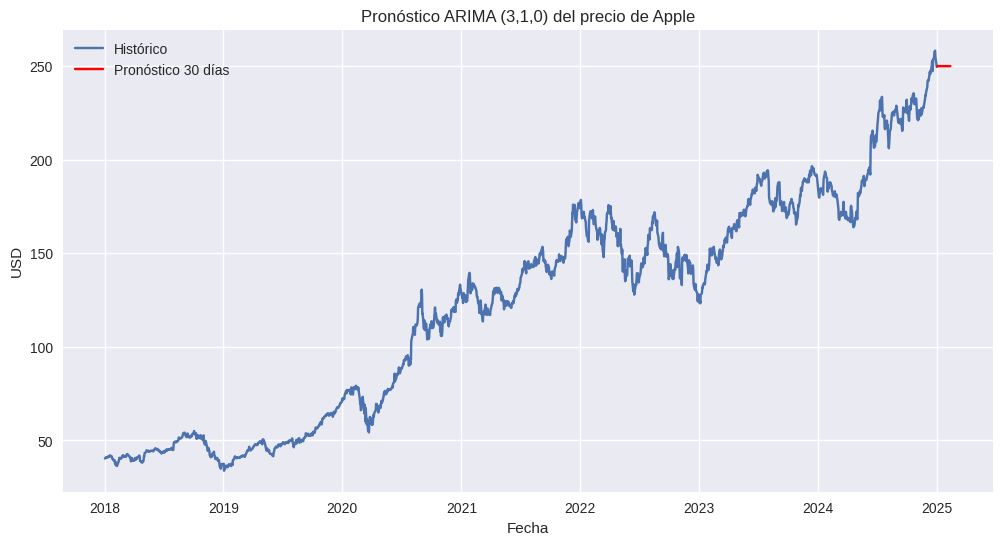

In [42]:
# -----------------------------
# ARIMA sobre precios directamente
# -----------------------------
series = apple  # precio de cierre

# Ajustar ARIMA(3,1,0)
model = ARIMA(series, order=(3,1,0))
model_fit = model.fit()

# Pronóstico 30 días
forecast = model_fit.forecast(steps=30)

# Crear índice de fechas
forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1),
                               periods=len(forecast), freq='B')
forecast = pd.Series(forecast.values, index=forecast_index)

# -----------------------------
# Gráfico
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(series, label="Histórico")
plt.plot(forecast, label="Pronóstico 30 días", color="red")
plt.title("Pronóstico ARIMA (3,1,0) del precio de Apple")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.legend()
plt.show()


In [ ]:
#arima no es adecuado para este problema dado que estoy usando ARIMA(3,1,0) sobre precios con d=1 y la serie de precios
#de Apple tiene tendencia fuerte y gran volatilidad diaria, pero el modelo ARIMA básico no logra capturar la tendencia
#a largo plazo con solo p=3 y q=0.

#Por eso la línea roja aparece plana: el modelo está pronosticando la diferencia media diaria, que es muy pequeña en
#comparación con el precio total. ARIMA no extrapola tendencias fuertes; proyecta una media de cambios recientes,
#y en precios altos eso parece una línea plana.

In [ ]:
#vamos a probrar con Holt-Winters (Exponential Smoothing)

/tmp/ipython-input-3197521045.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


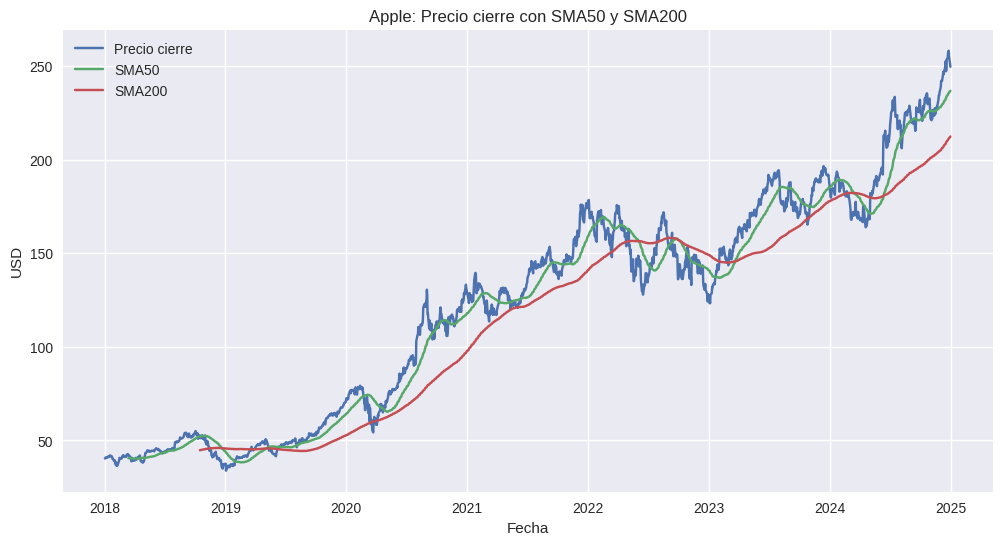

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


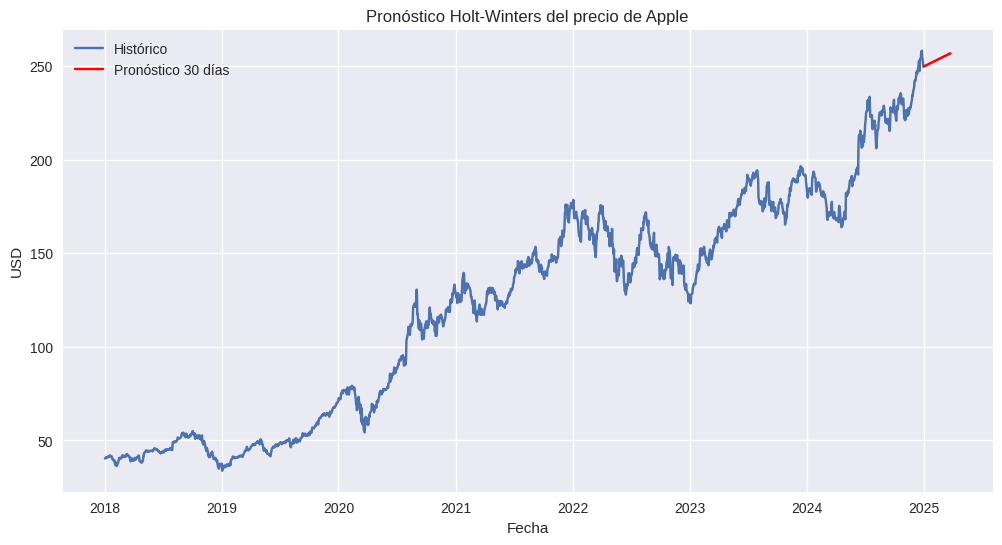

In [44]:
# -----------------------------
# 1. Importar librerías
# -----------------------------
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12,6)

# -----------------------------
# 2. Descargar datos Apple
# -----------------------------
apple = yf.download("AAPL", start="2018-01-01", end="2025-01-01")
series = apple['Close']  # precio de cierre

# -----------------------------
# 3. Medias móviles
# -----------------------------
SMA50 = series.rolling(window=50).mean()
SMA200 = series.rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(series, label="Precio cierre")
plt.plot(SMA50, label="SMA50")
plt.plot(SMA200, label="SMA200")
plt.title("Apple: Precio cierre con SMA50 y SMA200")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.legend()
plt.show()

# -----------------------------
# 4. Holt-Winters / Exponential Smoothing
# -----------------------------
# Modelo aditivo con tendencia lineal
model = ExponentialSmoothing(series, trend="add", seasonal=None)
model_fit = model.fit()

# Pronóstico 30 días
forecast = model_fit.forecast(60)

# Crear índice de fechas para forecast
forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1),
                               periods=len(forecast), freq='B')
forecast = pd.Series(forecast.values, index=forecast_index)

# -----------------------------
# 5. Gráfico histórico + pronóstico
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(series, label="Histórico")
plt.plot(forecast, label="Pronóstico 60 días", color="red")
plt.title("Pronóstico Holt-Winters del precio de Apple")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.legend()
plt.show()
